In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import Libraries and Data

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
# Import Data
data = pd.read_csv('Copy of device_data_1.xlsx - Sheet0.csv')
data.head()

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90


## Data Analysis and Processing

In [4]:
# Drop fields which are not required for the model
df = data.drop(['Time', 'Devicename'], axis = 1)
df.head()

,Temperature,TDS,PH,DO
0,29.0625,0.0,13.61598,9.91
1,29.0625,0.0,13.12313,9.90
2,29.0000,0.0,13.55723,9.90
3,29.0625,0.0,14.00000,9.90
4,29.0625,0.0,14.00000,9.90


In [5]:
df.describe()

,Temperature,TDS,PH,DO
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,26.042283,110.163128,5.813235,3.270148
std,1.265751,57.359872,1.716083,1.345019
min,24.875000,0.000000,4.875184,1.070000
25%,25.500000,124.877675,5.312549,2.610000
50%,25.687500,133.931700,5.413732,3.100000
75%,25.812500,136.523500,5.524703,3.450000
max,34.750000,744.276200,14.000000,9.940000


In [6]:
df.shape

(1150, 4)

array([[<AxesSubplot:title={'center':'DO'}>]], dtype=object)

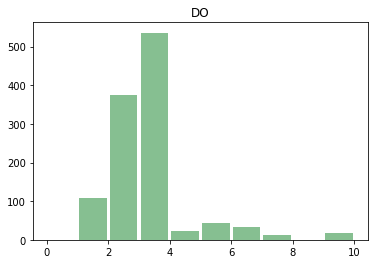

In [7]:
# visualize the datapoints in each range of "DO"
bins_list=[i for i in range(0,11)]
df.hist(column='DO', bins=bins_list, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

It can be observed that majourity of our data lies in the region having DO between (2,4).

To improve this dataset we will replicate the datapoints for DO > 4.

In [8]:
tempDf=df[(df['DO'] >= 4) & (df['DO'] < 7)]     # data having 4<=DO<7

df=pd.concat([tempDf,tempDf,tempDf,df],ignore_index=True)     # replicated 3 times in the original dataset
df

,Temperature,TDS,PH,DO
0,27.4375,127.0223,6.696456,6.96
1,27.4375,124.8190,6.885760,6.81
2,27.4375,125.0000,6.582215,6.67
3,27.4375,125.0896,6.559371,6.54
4,27.4375,126.5262,6.428812,6.42
...,...,...,...,...
1448,30.0625,127.5950,14.000000,7.84
1449,30.0625,125.1168,14.000000,7.16
1450,30.1250,141.9695,14.000000,6.79
1451,30.1250,142.7360,14.000000,6.50


In [9]:
tempDf=df[(df['DO'] >= 7) & (df['DO'] < 10)]      # data having 7<=DO<10

df=pd.concat([tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,df],ignore_index=True)    #replicating 8 times in the original dataset
df

,Temperature,TDS,PH,DO
0,29.0625,0.0000,13.61598,9.91
1,29.0625,0.0000,13.12313,9.90
2,29.0000,0.0000,13.55723,9.90
3,29.0625,0.0000,14.00000,9.90
4,29.0625,0.0000,14.00000,9.90
...,...,...,...,...
1688,30.0625,127.5950,14.00000,7.84
1689,30.0625,125.1168,14.00000,7.16
1690,30.1250,141.9695,14.00000,6.79
1691,30.1250,142.7360,14.00000,6.50


In [10]:
df = df.sample(frac=1).reset_index(drop=True)    # randomizing the data
df

,Temperature,TDS,PH,DO
0,25.6250,136.990600,5.260324,2.98
1,25.5000,0.000006,5.299491,3.09
2,31.4375,126.490500,5.583453,7.04
3,25.5625,136.243800,5.306023,2.16
4,30.1875,66.381450,14.000000,5.25
...,...,...,...,...
1688,25.5000,0.000006,5.377826,3.26
1689,26.2500,126.366200,5.697694,3.16
1690,25.5625,137.929000,5.407201,3.14
1691,25.6250,136.990600,5.195047,3.11


array([[<AxesSubplot:title={'center':'DO'}>]], dtype=object)

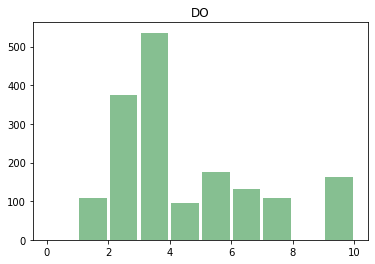

In [11]:
# visualize the datapoints in each range of "DO"
bins_list=[i for i in range(0,11)]
df.hist(column='DO', bins=bins_list, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

As we can observe, now the data is more evenly distributed than the previous one.  
This will improve the accuracy of our model.

<AxesSubplot:>

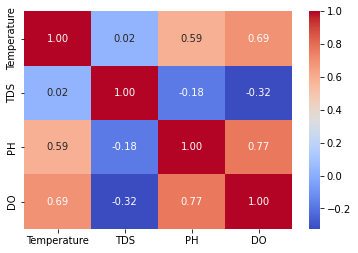

In [12]:
# Heatmap of the features. This shows how the features of our data depend on each other.
sns.heatmap(df[["Temperature","TDS","PH","DO"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

We can clearly see by DO is closely related to PH and Temperature.  
TDS is somewhat inversely related to DO.

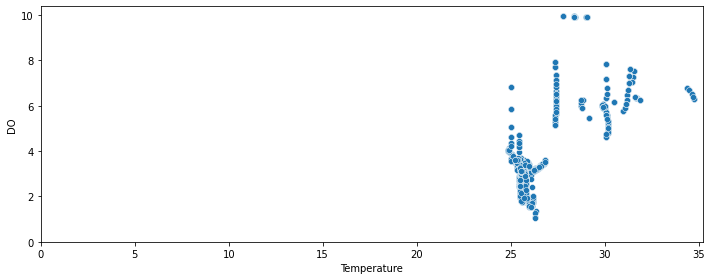

In [13]:
# Plot for Temperature vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['Temperature'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

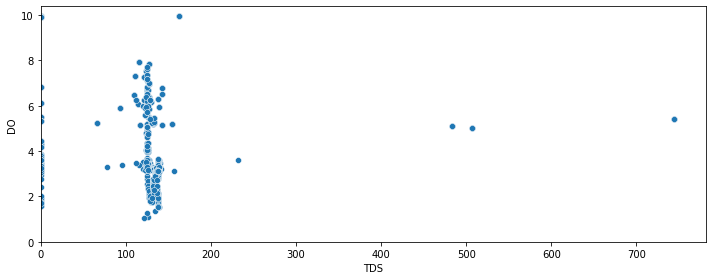

In [14]:
# Plot for TDS vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['TDS'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

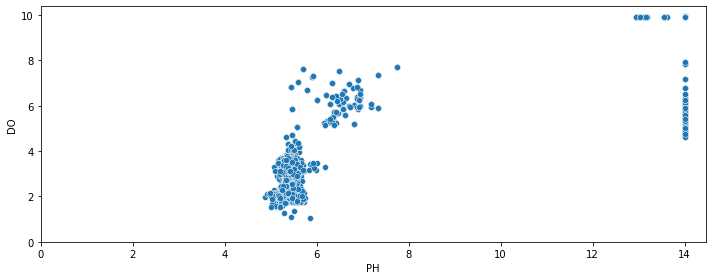

In [15]:
# Plot for PH vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['PH'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

In [16]:
# Normalizing the data
df['Temperature']=df['Temperature']/max(df['Temperature'])
df['TDS']=df['TDS']/max(df['TDS'])
df['PH']=df['PH']/max(df['PH'])
df.head()

,Temperature,TDS,PH,DO
0,0.737410,1.840588e-01,0.375737,2.98
1,0.733813,7.711078e-09,0.378535,3.09
2,0.904676,1.699510e-01,0.398818,7.04
3,0.735612,1.830554e-01,0.379002,2.16
4,0.868705,8.918927e-02,1.000000,5.25


In [17]:
# Check for NULL values
df.isnull().sum()

Temperature    0
TDS            0
PH             0
DO             0
dtype: int64

In [18]:
# Standard Scaling 

from sklearn.preprocessing import StandardScaler
df['Temperature'] = StandardScaler().fit_transform(df['Temperature'].values.reshape(-1,1))
df['PH'] = StandardScaler().fit_transform(df['PH'].values.reshape(-1,1))
df['TDS'] = StandardScaler().fit_transform(df['TDS'].values.reshape(-1,1))
df.head()

,Temperature,TDS,PH,DO
0,-0.641449,0.458819,-0.575886,2.98
1,-0.702832,-1.545290,-0.563480,3.09
2,2.212900,0.305207,-0.473536,7.04
3,-0.672140,0.447893,-0.561411,2.16
4,1.599062,-0.574161,2.192385,5.25


## Split Data

In [19]:
x = df.iloc[:, :-1]     # input features
y = df.iloc[:, -1]      # output feature

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, random_state = 20)

print("Number of fields in Training data = ",len(x_train))
print("Number of fields in Testing data = ",len(x_test))

Number of fields in Training data =  1523
Number of fields in Testing data =  170


In [20]:
x_train.head()

,Temperature,TDS,PH
611,0.248617,0.312987,-0.120994
694,1.752522,0.344849,-0.158213
1215,-0.549373,0.465673,-0.614137
1456,0.217925,0.371631,-0.289511
120,-0.549373,0.408701,-0.563480


In [21]:
y_train.head()

611     6.96
694     6.15
1215    2.09
1456    5.25
120     2.46
Name: DO, dtype: float64

## Model

In [22]:
# Setup
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

2022-01-20 01:38:51.870180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-20 01:38:51.870249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [23]:
# Defining function for Root Mean Squared Error
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [24]:
# Model Design

tf.random.set_seed(42)

model = Sequential([
    Dense(150, activation='relu'),
    Dense(450, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

2022-01-20 01:38:57.557346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-20 01:38:57.557435: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-20 01:38:57.557478: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (melio-Nitro): /proc/driver/nvidia/version does not exist
2022-01-20 01:38:57.558129: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


This model contains a 3-layered Neural Network with 'relu' as the activation function. 
- 150 neurons for first layer
- 450 neurons for first layer
- 100 neurons for first layer

In [25]:
# Training the data set
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
48/48 [==============================] - 2s 6ms/step - loss: 2.3389 - rmse: 2.3281
Epoch 2/1000
48/48 [==============================] - 0s 7ms/step - loss: 1.2852 - rmse: 1.2833
Epoch 3/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.8523 - rmse: 0.8524
Epoch 4/1000
48/48 [==============================] - 0s 8ms/step - loss: 0.6936 - rmse: 0.6924
Epoch 5/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.6861 - rmse: 0.6864
Epoch 6/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.6227 - rmse: 0.6220
Epoch 7/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.6282 - rmse: 0.6282
Epoch 8/1000
48/48 [==============================] - 0s 7ms/step - loss: 0.6133 - rmse: 0.6174
Epoch 9/1000
48/48 [==============================] - 0s 6ms/step - loss: 0.5928 - rmse: 0.5917
Epoch 10/1000
48/48 [==============================] - 0s 5ms/step - loss: 0.5982 - rmse: 0.5968
Epoch 11/1000
48/48 [==================

In [26]:
# Evaluate the model
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3526 - rmse: 0.3274


[0.35259896516799927, 0.3274325132369995]

In [27]:
# Make predictions for the testing data
pred = model.predict(x_test)

In [28]:
df_pred = pd.DataFrame(pred)
print("Prediction stats: ")
df_pred.describe()

Prediction stats: 


,0
count,170.000000
mean,4.397006
std,2.276229
min,1.537710
25%,2.864300
50%,3.406096
75%,5.814189
max,9.981517


In [29]:
print("y_test stats: ")
y_test.describe()

y_test stats: 


count    170.000000
mean       4.439588
std        2.284222
min        1.520000
25%        2.960000
50%        3.415000
75%        5.687500
max        9.930000
Name: DO, dtype: float64

We can compare the stats for pred and y_test

In [30]:
# Error Calculation
err = 0
pred = pred.flatten()
y_test = np.array(y_test)

for i in range(0,len(pred)):
  err = err + abs(pred[i]-y_test[i])/y_test[i]

err = err/pred.shape[0]

err

0.053676980349774264

In [31]:
# Difference between predicted and true value 
dif = abs(pred-y_test)
print("Mean of differences : ", np.mean(dif))
print("Median of differences : ", np.median(dif))

Mean of differences :  0.21341018502852493
Median of differences :  0.1211570072174073


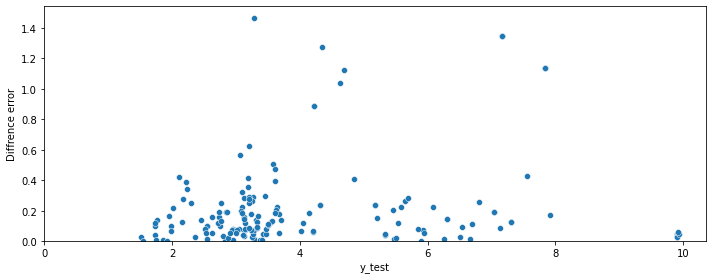

In [32]:
# Scatter-plot of yy
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = y_test, y = dif)

plt.xlabel('y_test')
plt.ylabel('Diffrence error')

plt.xlim(0)
plt.ylim(0)
plt.show()

## Conclusion:
- It is observed that now the difference error is relatively less than what it was observed earlier.

#### Note: 
- The data replication should be less. If we replicate the data multiple number of times then there would be chances of Overfitting.
